# HEART DISEASE PREDICTION USING MACHINE LEARNING ALGORITHMS

## MODULE 1: EXPLORATORY DATA ANALYSIS

### Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
eda=pd.read_csv('heart.csv')

### Explaning the dataset

###### Age 
age in years
###### Sex  
(1 = male; 0 = female)
###### cp 
chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
###### trestbps
resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
###### chol
serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
###### fbs 
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
###### restecg
resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
###### thalach
maximum heart rate achieved
###### exang
exercise induced angina (1 = yes; 0 = no)
###### oldpeak
ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
###### slope
the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
###### ca
number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
###### thal
thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
###### target
have disease or not (1=yes, 0=no) (= the predicted attribute)


In [3]:
eda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
eda.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
eda.shape

(303, 14)

### STEP 1: Variable Identification 

#### Dependent Variable:¶
         target

#### Independent Variables:
    1.sex 2.cp 3.fbs 4.restecg 5.exang 6.slope 7.ca 8.thal 9.age 10.trestbps 11.chol 12.thalach 13.oldpeak

### Variable Category:

#### Categorical variables:
         1.sex 2.cp 3.fbs 4.restecg 5.exang 6.slope 7.ca 8.thal 9.target

##### Continuous Variables:
        1.age 2.trestbps 3.chol 4.thalach 5.oldpeak

In [6]:

eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
eda.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### STEP 2: UNIVARIATE ANALYSIS

#### Catagorical Variables:

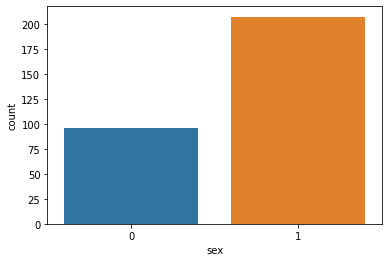

In [8]:
sns.countplot(x='sex',data=eda)

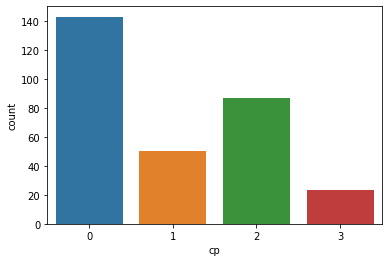

In [9]:
sns.countplot(x='cp',data=eda)

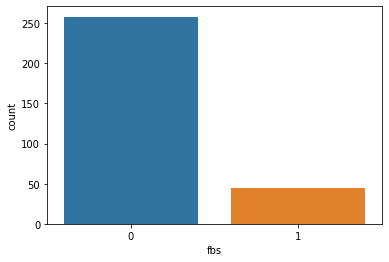

In [10]:
sns.countplot(x='fbs',data=eda)

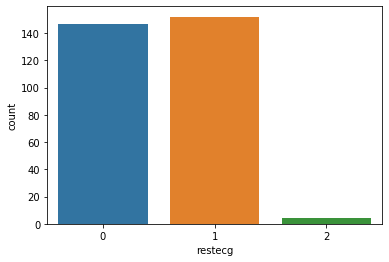

In [11]:
sns.countplot(x='restecg',data=eda)

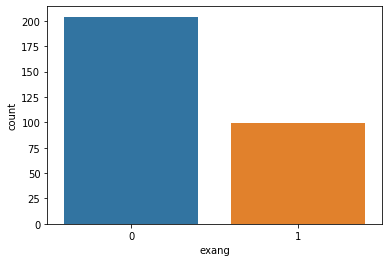

In [12]:
sns.countplot(x='exang',data=eda)

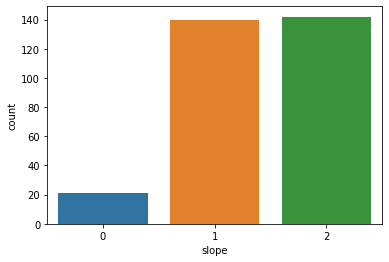

In [13]:
sns.countplot(x='slope',data=eda)

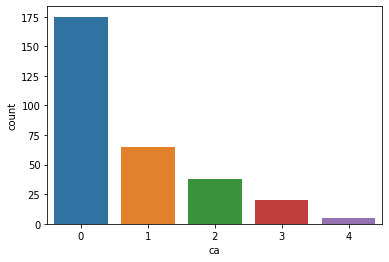

In [14]:
sns.countplot(x='ca',data=eda)

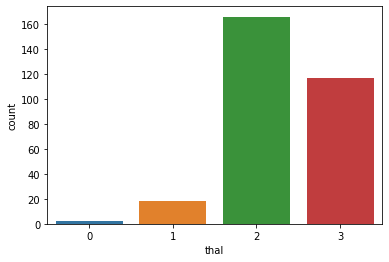

In [15]:
sns.countplot(x='thal',data=eda)

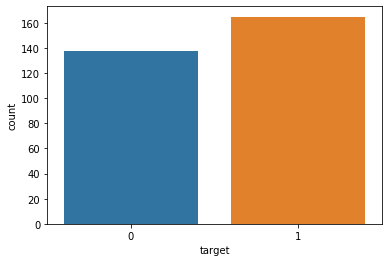

In [16]:
sns.countplot(x='target',data=eda)

#### Continuous Variables:

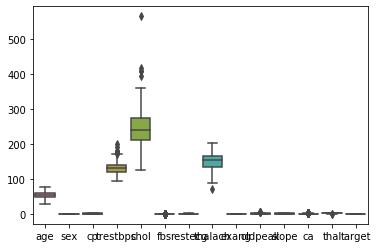

In [17]:
sns.boxplot(data=eda)

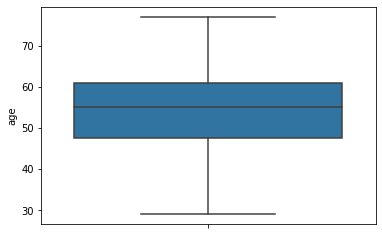

In [18]:
sns.boxplot(y='age',data=eda)

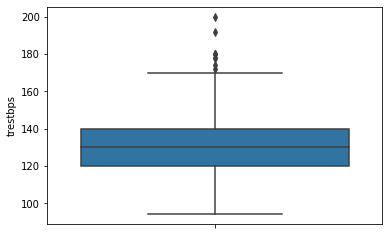

In [19]:
sns.boxplot(y='trestbps',data=eda)

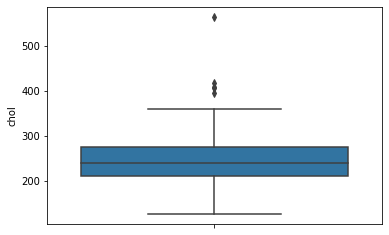

In [20]:
sns.boxplot(y='chol',data=eda)

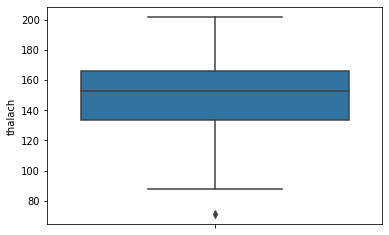

In [21]:
sns.boxplot(y='thalach',data=eda)

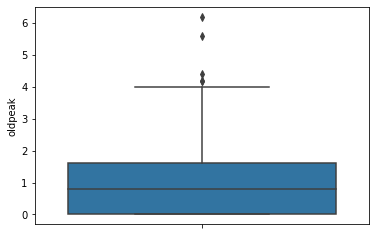

In [22]:
sns.boxplot(y='oldpeak',data=eda)

### STEP 3: BIVARIATE ANALYSIS

#### Continuous and Continuous:

Text(0, 0.5, 'trestbps')

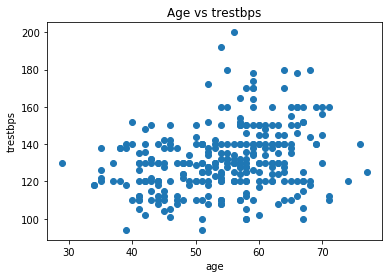

In [23]:
plt.scatter(eda['age'],eda['trestbps'])
plt.title('Age vs trestbps')
plt.xlabel('age')
plt.ylabel('trestbps')

Text(0, 0.5, 'chol')

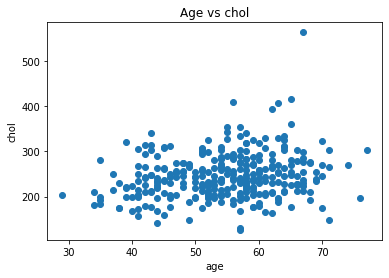

In [24]:
plt.scatter(eda['age'],eda['chol'])
plt.title('Age vs chol')
plt.xlabel('age')
plt.ylabel('chol')

Text(0, 0.5, 'thalach')

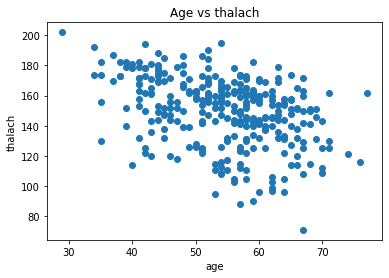

In [25]:
plt.scatter(eda['age'],eda['thalach'])
plt.title('Age vs thalach')
plt.xlabel('age')
plt.ylabel('thalach')

Text(0, 0.5, 'oldpeak')

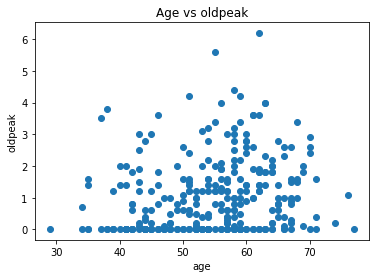

In [26]:
plt.scatter(eda['age'],eda['oldpeak'])
plt.title('Age vs oldpeak')
plt.xlabel('age')
plt.ylabel('oldpeak')

(14.5, -0.5)

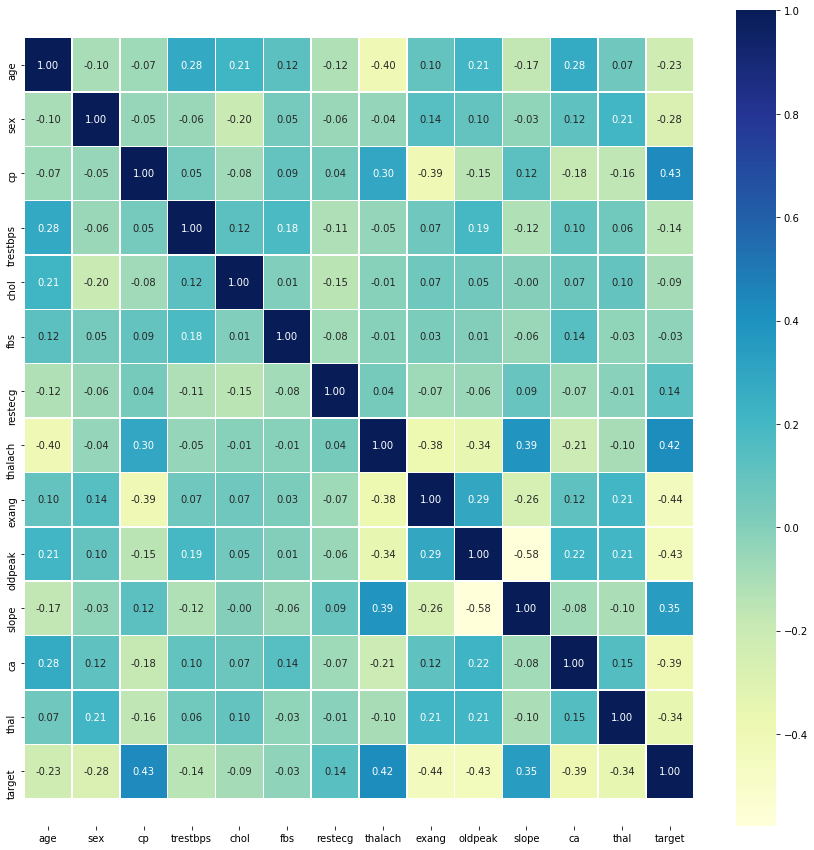

In [27]:
corr = eda.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

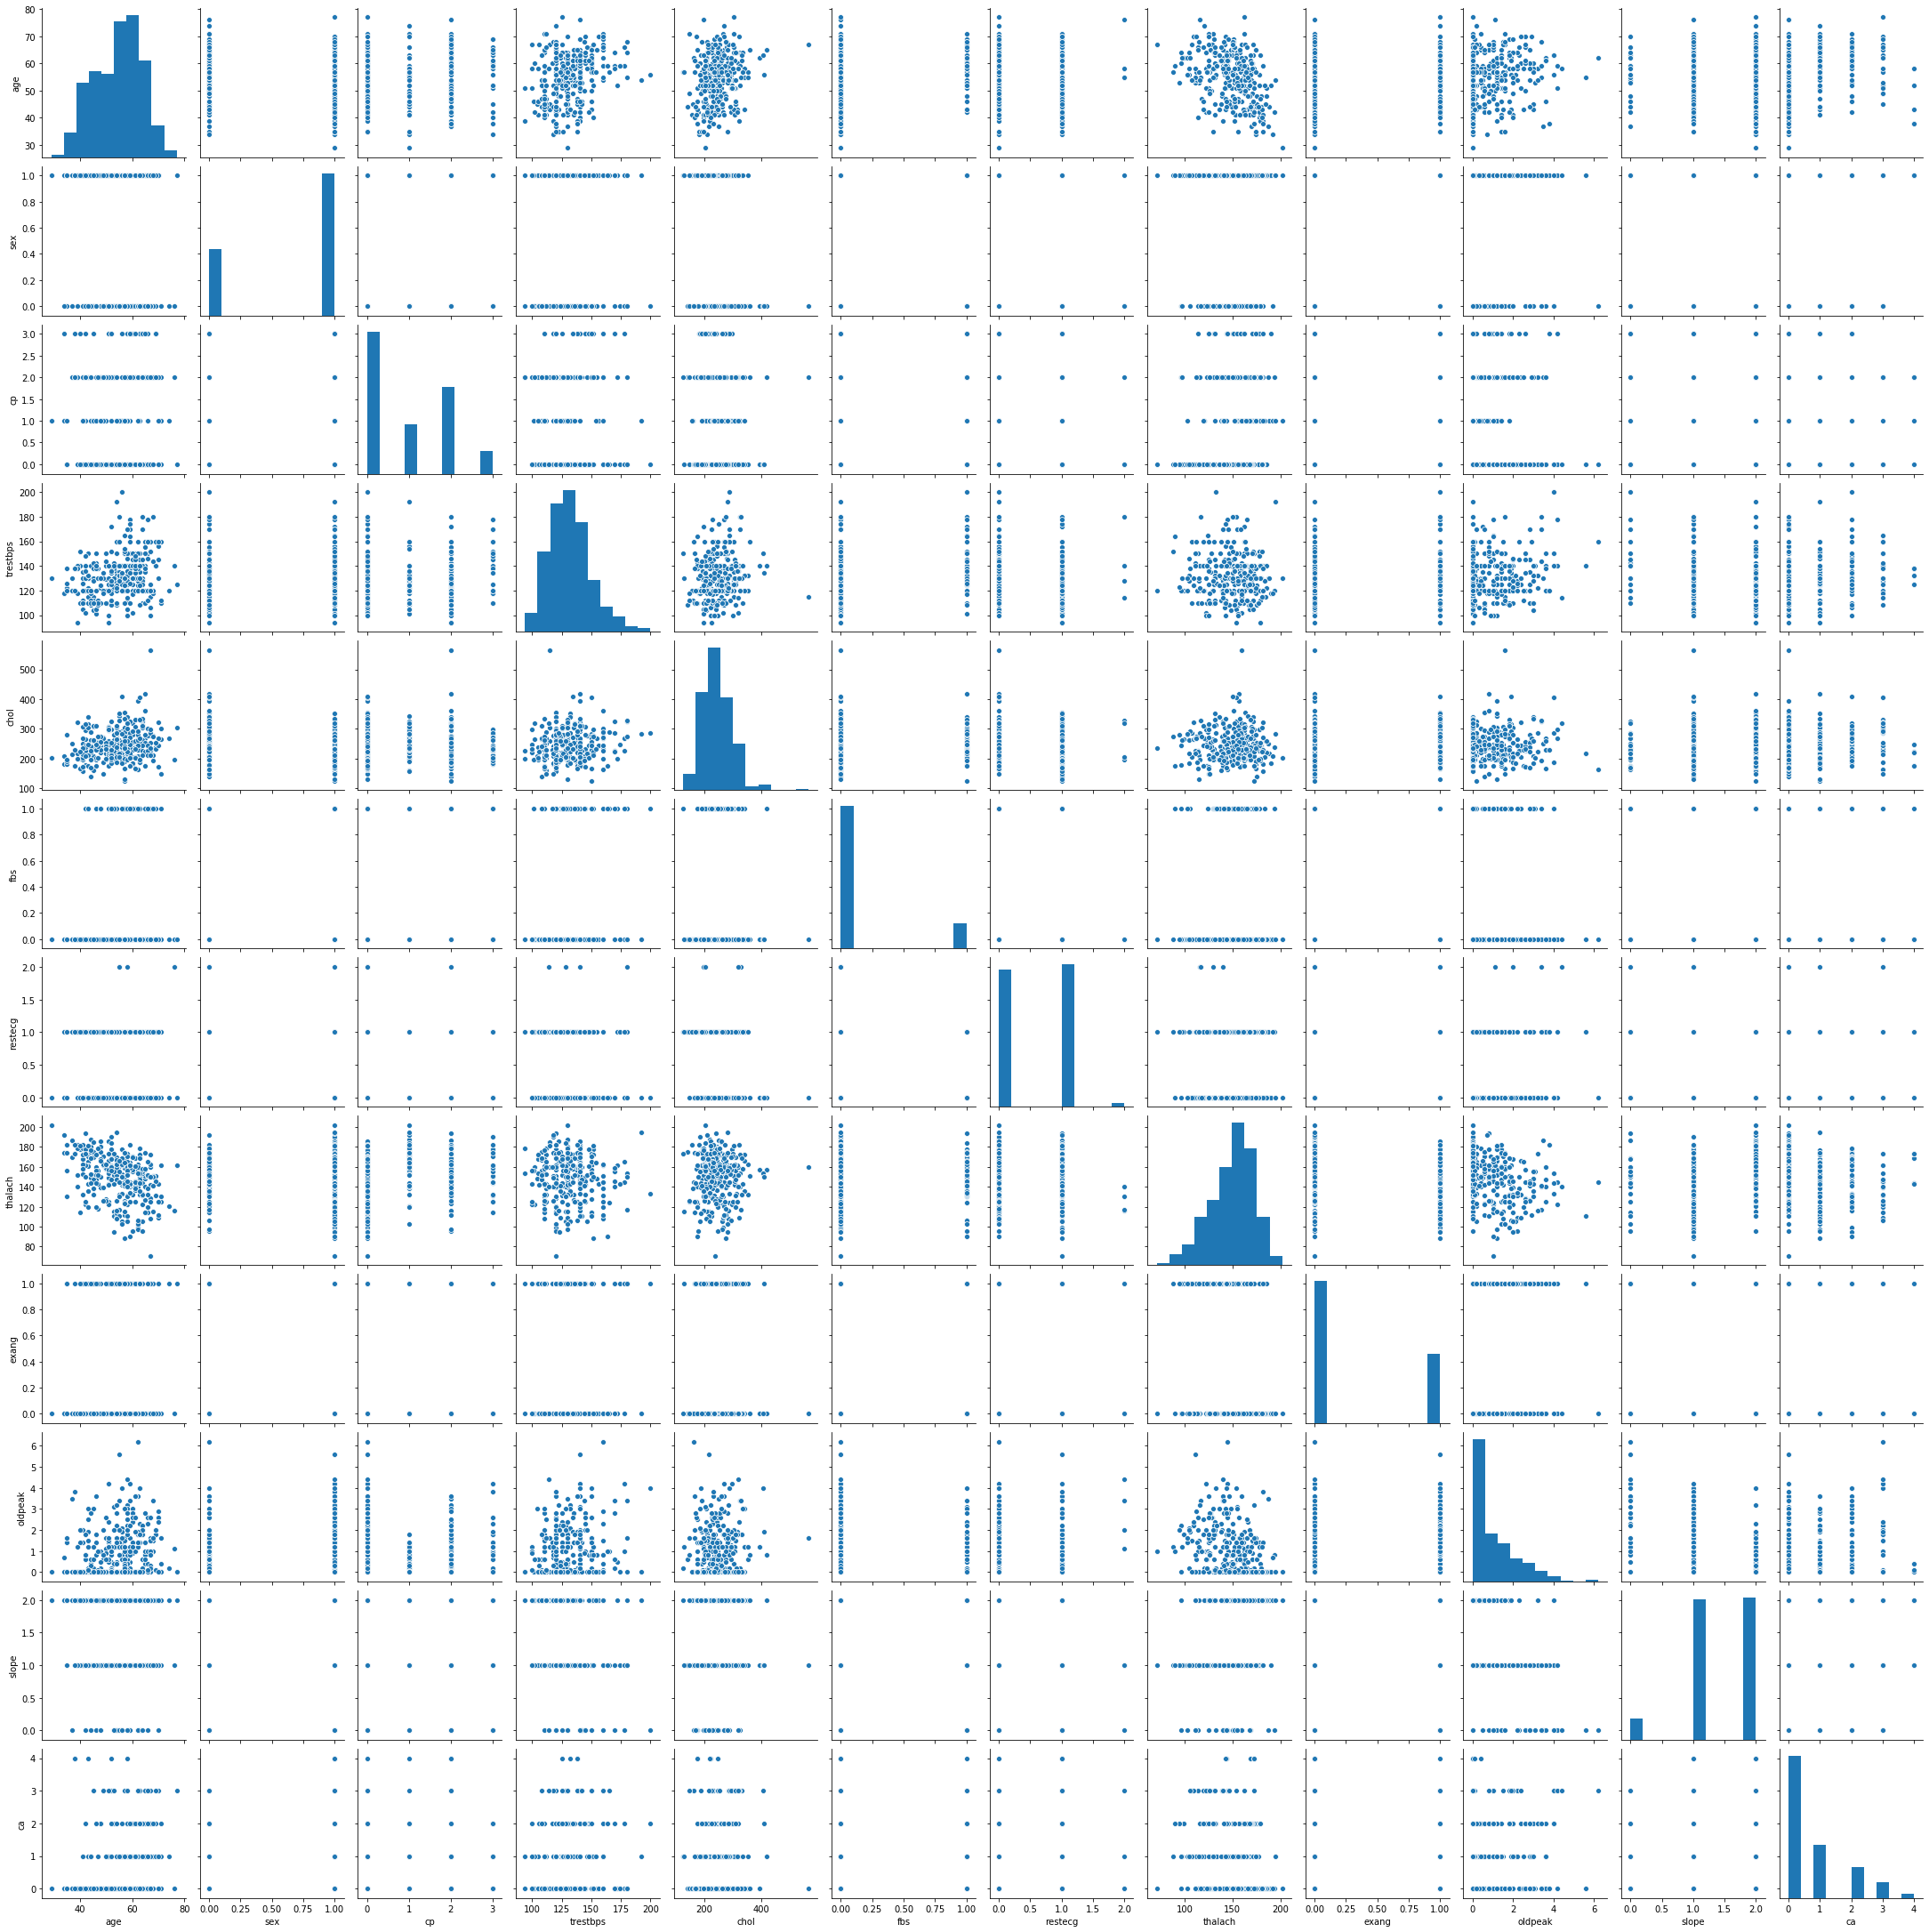

In [28]:
eda_cont=eda.iloc[:,:-2]
eda_cont
sns.pairplot(eda_cont)

#### Categorical and Categorical:

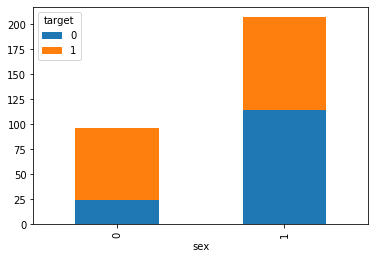

In [29]:
counts=eda.groupby(['sex','target'],axis=0)
counts.size()
pd.crosstab(eda['sex'],eda['target']).plot(kind='bar',stacked=True)

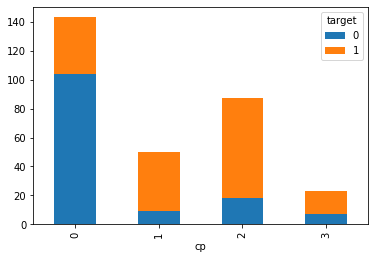

In [30]:
counts1=eda.groupby(['cp','target'],axis=0)
counts1.size()
pd.crosstab(eda['cp'],eda['target']).plot(kind='bar',stacked=True)

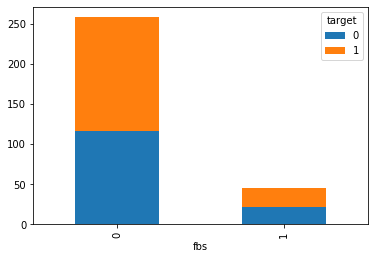

In [31]:
counts2=eda.groupby(['fbs','target'],axis=0)
counts2.size()
pd.crosstab(eda['fbs'],eda['target']).plot(kind='bar',stacked=True)

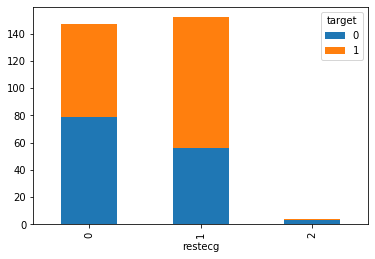

In [32]:
counts3=eda.groupby(['restecg','target'],axis=0)
counts3.size()
pd.crosstab(eda['restecg'],eda['target']).plot(kind='bar',stacked=True)

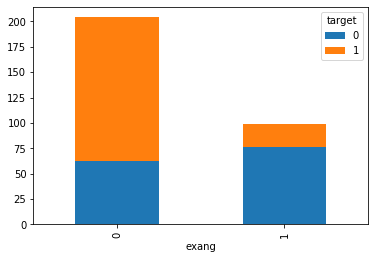

In [33]:
counts4=eda.groupby(['exang','target'],axis=0)
counts4.size()
pd.crosstab(eda['exang'],eda['target']).plot(kind='bar',stacked=True)

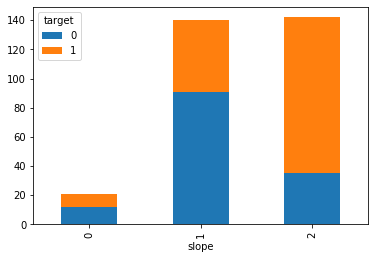

In [34]:
counts5=eda.groupby(['slope','target'],axis=0)
counts5.size()
pd.crosstab(eda['slope'],eda['target']).plot(kind='bar',stacked=True)

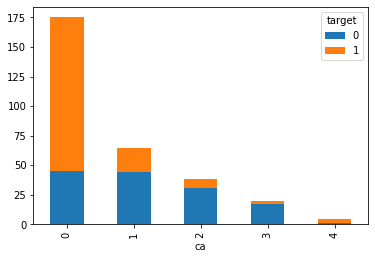

In [35]:
counts6=eda.groupby(['ca','target'],axis=0)
counts6.size()
pd.crosstab(eda['ca'],eda['target']).plot(kind='bar',stacked=True)

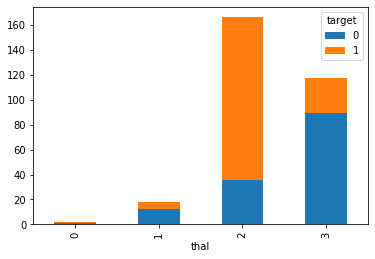

In [36]:
counts7=eda.groupby(['thal','target'],axis=0)
counts7.size()
pd.crosstab(eda['thal'],eda['target']).plot(kind='bar',stacked=True)

#### Continuous and Catagorical:

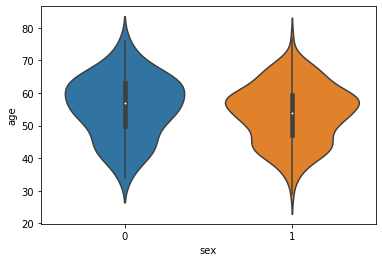

In [37]:
sns.violinplot(x='sex',y='age',data=eda)

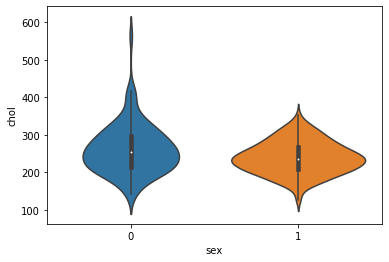

In [38]:
sns.violinplot(x='sex',y='chol',data=eda)

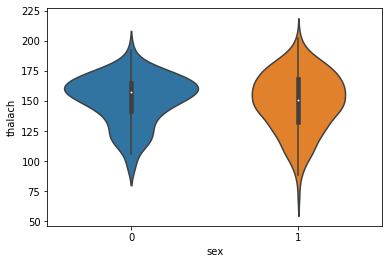

In [39]:
sns.violinplot(x='sex',y='thalach',data=eda)

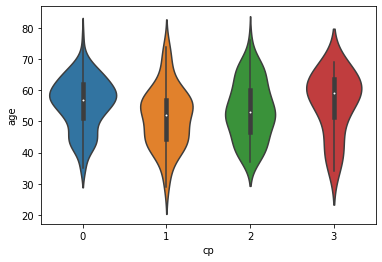

In [40]:
sns.violinplot(x='cp',y='age',data=eda)

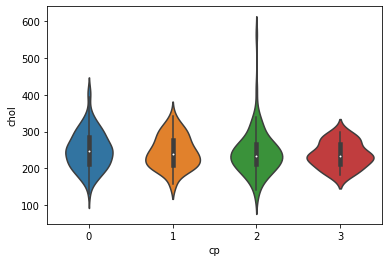

In [41]:
sns.violinplot(x='cp',y='chol',data=eda)

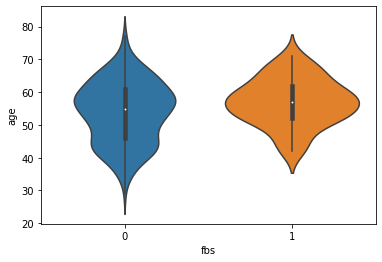

In [42]:
sns.violinplot(x='fbs',y='age',data=eda)

### STEP 4: MISSING VALUE TREATMENT

In [43]:
eda.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
eda.isnull().values.any()

False

In [45]:
eda.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### STEP 5: OUTLIER TREATMENT

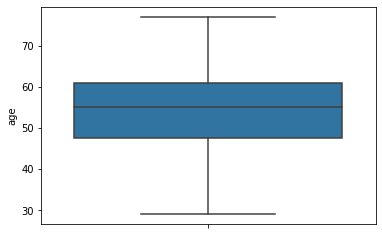

In [47]:
sns.boxplot(y='age',data=eda)

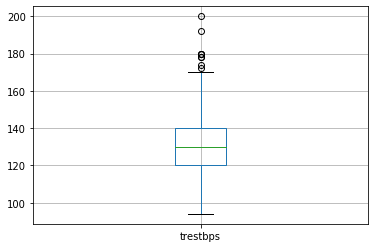

In [48]:
eda.boxplot(column = ['trestbps'])

In [49]:
eda['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [50]:
IQR = eda['trestbps'].quantile(0.75)-eda['trestbps'].quantile(0.25)
print(IQR)

20.0


In [51]:
Upper_OutlierLimit = eda['trestbps'].quantile(0.75) + 1.5*IQR
Upper_OutlierLimit

170.0

In [52]:
eda[eda['trestbps']>Upper_OutlierLimit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [53]:
for i in range(8,266):
    if((eda['trestbps'][i]>=Upper_OutlierLimit)):
        eda['trestbps'][i]=eda['trestbps'].quantile(0.85)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


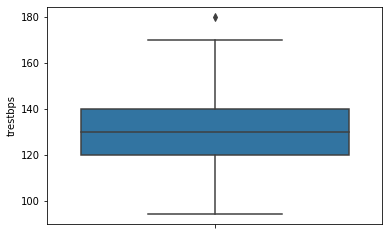

In [54]:
sns.boxplot(y='trestbps',data=eda)

In [55]:
for i in range(0,302):
    if(eda['trestbps'][i]>=160):
        eda['trestbps'][i]=eda['trestbps'].quantile(0.95)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


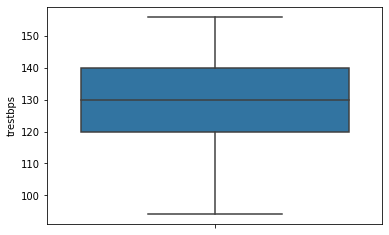

In [56]:
sns.boxplot(y='trestbps',data=eda)

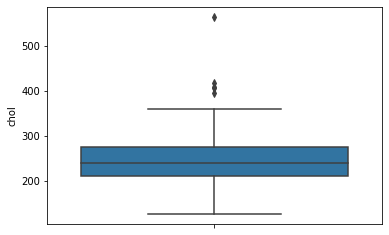

In [57]:
sns.boxplot(y='chol',data=eda)

In [58]:
eda['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [59]:
IQR = eda['chol'].quantile(0.75)-eda['chol'].quantile(0.25)
print(IQR)

63.5


In [60]:
Upper_OutlierLimit = eda['chol'].quantile(0.75) + 1.5*IQR
Upper_OutlierLimit

369.75

In [61]:
eda[eda['chol']>Upper_OutlierLimit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [62]:
for i in range(0,288):
    if((eda['chol'][i]>=Upper_OutlierLimit)):
        eda['chol'][i]=eda['chol'].quantile(0.85)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


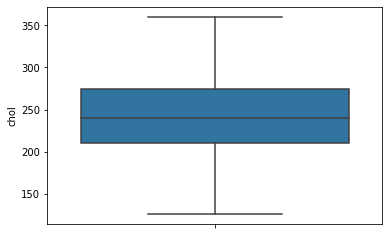

In [63]:
sns.boxplot(y='chol',data=eda)

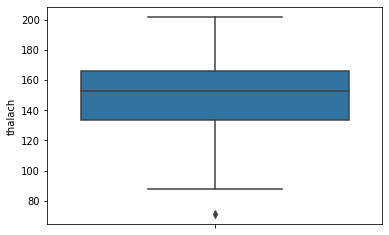

In [64]:
sns.boxplot(y='thalach',data=eda)

In [65]:
eda['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [66]:
IQR = eda['thalach'].quantile(0.75)-eda['thalach'].quantile(0.25)
print(IQR)

32.5


In [67]:
Lower_OutlierLimit = eda['thalach'].quantile(0.25) - 1.5*IQR
print(Lower_OutlierLimit)

84.75


In [68]:
OutlierValues = eda[(eda['thalach']>=Lower_OutlierLimit)]
OutlierValues

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [69]:
for i in range(0,302):
    if((eda['thalach'][i]<=Lower_OutlierLimit)):
        eda['thalach'][i]=eda['thalach'].quantile(0.85)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


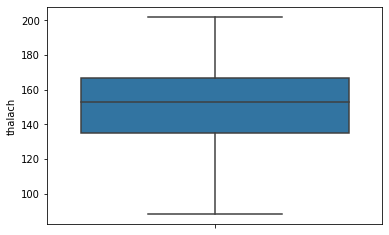

In [70]:
sns.boxplot(y='thalach',data=eda)

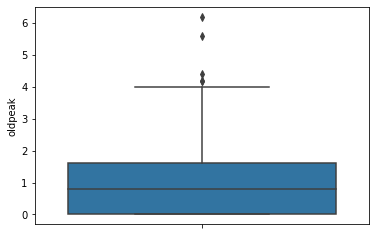

In [71]:
sns.boxplot(y='oldpeak',data=eda)

In [72]:
eda['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [73]:
IQR = eda['oldpeak'].quantile(0.75)-eda['oldpeak'].quantile(0.25)
print(IQR)

1.6


In [74]:
Upper_OutlierLimit = eda['oldpeak'].quantile(0.75) + 1.5*IQR
print(Upper_OutlierLimit)

4.0


In [75]:
OutlierValues = eda[(eda['oldpeak']>=Upper_OutlierLimit)]
OutlierValues

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,150,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,155,164,0,0,145,0,6.2,0,3,3,0
220,63,0,0,150,298,0,0,154,0,4.0,1,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
223,56,0,0,150,288,1,0,133,1,4.0,0,2,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0


In [76]:
for i in range(101,295):
    if((eda['oldpeak'][i]>=Upper_OutlierLimit)):
        eda['oldpeak'][i]=eda['oldpeak'].quantile(0.85)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


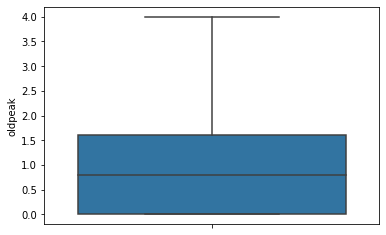

In [77]:
sns.boxplot(y='oldpeak',data=eda)

### STEP 6:  DUMMY VARIABLE CREATION

In [78]:
obj=eda.dtypes == np.object
print(obj)

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


In [79]:
dummydf = pd.DataFrame()
for i in eda.columns[obj]:
    dummy=pd.get_dummies(eda[i], drop_first=True)
 #"drop_first" drops the first category in order to avoid multicollinearity problem
 #prefix is used to add a certain prefix to all the dummy variables created for any particular categorial variable

    dummydf=pd.concat([dummydf, dummy], axis=1) # Concatenating Columns
 #"pd.concat" combines all the dummy columns for all the categorical variables

print(dummydf)

Empty DataFrame
Columns: []
Index: []


In [80]:
h = pd.get_dummies(eda, drop_first=True)
h

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [81]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## MODULE 2: DATA MODELLING STEPS

### STEP 1: Defining X and Y

In [82]:
cols=['age','sex','cp','trestbps','chol','fbs',
     'restecg','thalach','exang','oldpeak','slope','ca','thal','target']
h=h[cols]
h

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [83]:
X=h.iloc[:,:-1].values
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [84]:
X.shape

(303, 13)

In [85]:
y=h.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
y.shape

(303,)

### STEP 2: SPLIT THE DATA INTO TRAIN AND TEST

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=0)

In [93]:
X_train.shape
X_test.shape

(30, 13)

In [94]:
y_train.shape
y_test.shape

(30,)

In [95]:
X_test

array([[7.00e+01, 1.00e+00, 0.00e+00, 1.45e+02, 1.74e+02, 0.00e+00,
        1.00e+00, 1.25e+02, 1.00e+00, 2.60e+00, 0.00e+00, 0.00e+00,
        3.00e+00],
       [6.40e+01, 1.00e+00, 3.00e+00, 1.50e+02, 2.27e+02, 0.00e+00,
        0.00e+00, 1.55e+02, 0.00e+00, 6.00e-01, 1.00e+00, 0.00e+00,
        3.00e+00],
       [5.90e+01, 1.00e+00, 3.00e+00, 1.50e+02, 2.88e+02, 0.00e+00,
        0.00e+00, 1.59e+02, 0.00e+00, 2.00e-01, 1.00e+00, 0.00e+00,
        3.00e+00],
       [6.00e+01, 1.00e+00, 0.00e+00, 1.25e+02, 2.58e+02, 0.00e+00,
        0.00e+00, 1.41e+02, 1.00e+00, 2.80e+00, 1.00e+00, 1.00e+00,
        3.00e+00],
       [6.20e+01, 1.00e+00, 2.00e+00, 1.30e+02, 2.31e+02, 0.00e+00,
        1.00e+00, 1.46e+02, 0.00e+00, 1.80e+00, 1.00e+00, 3.00e+00,
        3.00e+00],
       [4.80e+01, 1.00e+00, 0.00e+00, 1.24e+02, 2.74e+02, 0.00e+00,
        0.00e+00, 1.66e+02, 0.00e+00, 5.00e-01, 1.00e+00, 0.00e+00,
        3.00e+00],
       [4.00e+01, 1.00e+00, 0.00e+00, 1.10e+02, 1.67e+02, 0.00e+00,
  

### STEP 3: BUILD THE MODEL

#### Logistic Regression 

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr=LogisticRegression()

In [99]:
lr.fit(X_train,y_train)

C:\Users\91897\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred=lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [101]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
print(confusion)

[[15  1]
 [ 2 12]]


In [102]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]
print(confusion)
print("TN :",TN)
print("FP :",FP)
print("FN :",FN)
print("TP :",TP)

[[15  1]
 [ 2 12]]
TN : 15
FP : 1
FN : 2
TP : 12


In [103]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy : ",round(accuracy,2)*100)
recall=recall_score(y_test,y_pred)
print("Recall : ",round(recall,2)*100)
precision=precision_score(y_test,y_pred)
print("Precision : ",round(precision,2)*100)
f1=f1_score(y_test,y_pred)
print("f1 score : ",round(f1,2)*100)
roc_auc=roc_auc_score(y_test,y_pred)
print("roc_auc : ",round(roc_auc,2)*100)

Accuracy :  90.0
Recall :  86.0
Precision :  92.0
f1 score :  89.0
roc_auc :  90.0


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
error = []
accuracy = []
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

In [ ]:
y_pred1 = classifier.predict(X_test)
y_pred1

In [ ]:
confusion_matrix(y_test, y_pred1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

In [ ]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred1)*100,2),"%")

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf=clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
y_pred

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy : ",round(metrics.accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
 filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=12000, height=12000)

#### Random Forset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 40, n_jobs= 2, random_state=0)
clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
y_pred

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
print("Accuracy : ",round(metrics.accuracy_score(y_test,y_pred)*100,2),"%")

In [ ]:
pd.crosstab(y_test, y_pred, rownames = ['Actual Status'], colnames = [
'Predicted Status'])

#### Bagging meta-estimator

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

#### ADaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test,y_test)

#### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

#### XGBoost

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=0,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

#### ROC Curves

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#Decision tree
model1=DecisionTreeClassifier()
model2=RandomForestClassifier(n_estimators=10,n_jobs=2,random_state=0)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)


In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [104]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(y_pred_dt.shape)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")


(30,)
The accuracy score achieved using Decision Tree is: 70.0 %
